In [1]:
ColabNotebook = 'google.colab' in str(get_ipython())

if ColabNotebook:
    # monta Google drive en entorno COLAB
    from google.colab import drive
    drive.mount('/content/drive/')
    
    DATOS_DIR = '/content/drive/MyDrive/DATOS/'      # carpeta donde se encuentran los datasets
else:
    # configuración para notebook con instalación LOCAL
    DATOS_DIR = '../MIDUSI - Teoria/Datos/'          # carpeta donde se encuentran los datasets

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as sch
from sklearn.preprocessing import StandardScaler

In [3]:
# Cargar el dataset iris.csv
df = pd.read_csv(DATOS_DIR+"iris.csv")  # Asegúrate de tener el archivo en el directorio de trabajo


In [4]:
# Extraer características y etiquetas
X = df.iloc[:, :-1].values  # Todas las columnas excepto la última (características)
labels = df.iloc[:, -1].values  # Última columna (nombre de la especie)


In [5]:
# Estandarizar los datos (opcional, pero recomendado)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

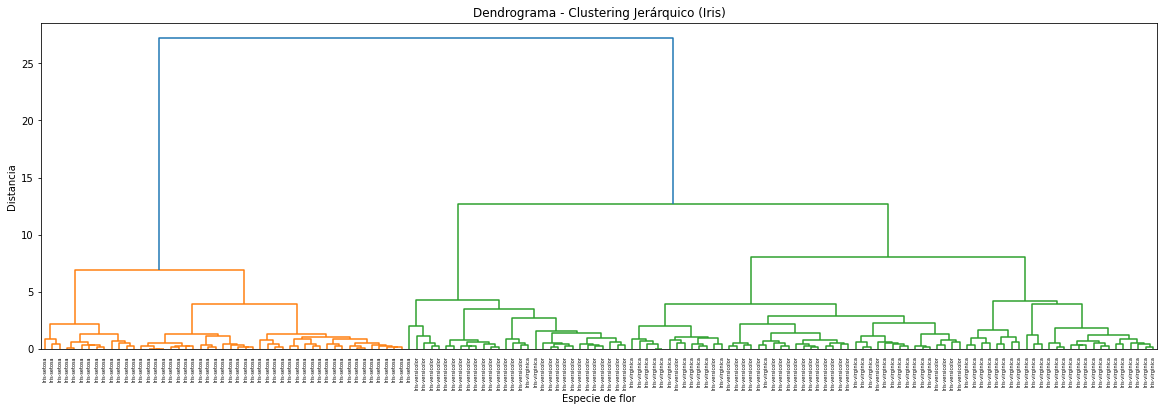

In [6]:
# Aplicar clustering jerárquico
linkage_matrix = sch.linkage(X_scaled, method='ward')

# Crear el dendrograma con etiquetas personalizadas
plt.figure(figsize=(20, 6))
sch.dendrogram(linkage_matrix, labels=labels, leaf_rotation=90)
plt.title("Dendrograma - Clustering Jerárquico (Iris)")
plt.xlabel("Especie de flor")
plt.ylabel("Distancia")
plt.show()


In [7]:
# Mapear colores a cada especie
color_map = {"Iris-setosa": "red", "Iris-versicolor": "blue", "Iris-virginica": "green"}
label_colors = [color_map[label] for label in labels]

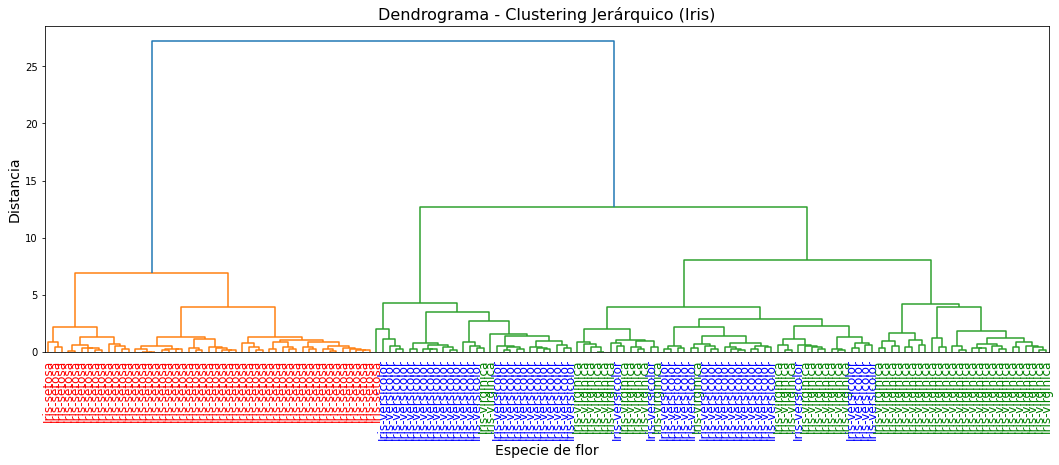

In [8]:
# Crear el dendrograma con etiquetas de colores
plt.figure(figsize=(18, 6))  # Ampliar tamaño para mejorar legibilidad
dendrogram = sch.dendrogram(
    linkage_matrix,
    labels=labels,
    leaf_rotation=90,  # Mantener los nombres en horizontal
    leaf_font_size=12  # Aumentar tamaño del texto
)

# Aplicar colores a los nombres de las hojas
ax = plt.gca()
xlbls = ax.get_xmajorticklabels()
for lbl in xlbls:
    lbl.set_color(color_map[lbl.get_text()])  # Asignar color según especie

plt.title("Dendrograma - Clustering Jerárquico (Iris)", fontsize=16)
plt.xlabel("Especie de flor", fontsize=14)
plt.ylabel("Distancia", fontsize=14)
plt.show()